# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Nurul Aisyah
- **Email:** nurul.byn10@gmail.com
- **ID Dicoding:** nurulbyn

## Menentukan Pertanyaan Bisnis

- Musim apa yang paling banyak dan paling sedikit jumlah pengguna sepeda?
- Kapan waktu paling banyak terdapat pengguna sepeda?
- Hari apa yang memiliki jumlah pesepeda dalam beberapa bulan terakhir?
- Berapa perbandingan pengguna yang berlangganan dan tidak berlangganan?

## Import Semua Packages/Library yang Digunakan

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Memuat tabel days menjadi dataframe

In [9]:
days_df = pd.read_csv("day.csv")
#menampilkan 5 baris pertama dalam dataframe
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Memuat tabel hours dan membuat menjadi dataframe

In [10]:
hours_df = pd.read_csv("hour.csv")
#menampilkan 5 bari pertama dalam dataframe
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [11]:
#menilai data days_df
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Dari pengecekan days_df terlihat tidak ada missing value. Namun, pada kolom dteday bertipe object dan harud diubah menjadi datetime

In [12]:
#mengecek duplikasi data days_df
print("Jumlah Duplikasi : ", days_df.duplicated().sum())

Jumlah Duplikasi :  0


Jumlah duplikasi dalam days_df tidak ada

In [13]:
#mengecek parameter statistika data days_df
days_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


dari ringkasan parameter diatas, tidak ada nilai yang menunjukan keanehan

In [14]:
#menilai data hours_df
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Dari pengecekan diatas, tidak terdapat missing value, tetapi terdapat colom dteday yang menunjukan tanggal. Namun memiliki tipe object

In [15]:
#mengecek duplikasi data hours_df
print("Jumlah duplikasi : ",hours_df.duplicated().sum())

Jumlah duplikasi :  0


Setelah dilakukan pengecekan duplikasi, tidak ditemukan nilai yang duplikasi

In [16]:
#mengecek parameter statistika data hours_df
hours_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Pada pengecekan parameter, tidak terdapat keanehan pada data tersebut

### Cleaning Data

Mengatasi masalah tipe data pada kolom dteday yang memiliki tipe object. kemudian akan diubah mejadi tipe data datetime

In [17]:
#mengganti tipe data date time pada dete days_df
datetime_columns = ["dteday"]

for column in datetime_columns:
  days_df[column] = pd.to_datetime(days_df[column])

In [18]:
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Terlihat bahwa kolom dteday sudah berubah menjadi tipe data datetime

Masalah pada data hours_df adalah pada kolom dteday memiliki tipe data object. Selanjutnya akan diubah menjadi tipe data datetime

In [19]:
#mengganti tipe data date time pada dete hours_df
datetime_columns = ["dteday"]

for column in datetime_columns:
  hours_df[column] = pd.to_datetime(hours_df[column])

In [20]:
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Masalah telah terselesaikan, kolom dteday sudah berubah menjadi datetime

## Exploratory Data Analysis (EDA)

### Explore ...

Eksplorasi data days_df

Eksplorasi dimulai dari pergantian angka 1-4 pada kolom season menjadi springer, summer, fall, winter. Kemudian pergantian pada kolom weathersit dari angka 1-4 menjadi clear, mist, light snow, dan heavy rain. Hal ini bertujuan untuk mempermudah pemahaman terhadap data

In [61]:
#mengganti bagian season
days_df.season.replace([1,2,3,4], ['Springer', 'Summer', 'Fall', 'Winter'], inplace=True)
days_df.head()

days_df.weathersit.replace([1,2,3,4], ['Clear', 'Mist', 'Light Snow', 'Heavy Rain'], inplace=True)
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Springer,0,1,0,6,0,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Springer,0,1,0,0,0,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Springer,0,1,0,1,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Springer,0,1,0,2,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Springer,0,1,0,3,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Kemudian dilakukan pengecekan, pada kolom season sudah terganti menjadi nama musim dam pada kolom weathersit sudah berganti menjadi cuacanya

Selanjutnya melakukan hal yang sama terhadap data hours_df

In [62]:
hours_df.season.replace([1,2,3,4], ['Springer', 'Summer', 'Fall', 'Winter'], inplace=True)
hours_df.head()

hours_df.weathersit.replace([1,2,3,4], ['Clear', 'Mist', 'Light Snow', 'Heavy Rain'], inplace=True)
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Springer,0,1,0,0,6,0,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Springer,0,1,1,0,6,0,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Springer,0,1,2,0,6,0,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Springer,0,1,3,0,6,0,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Springer,0,1,4,0,6,0,Clear,0.24,0.2879,0.75,0.0,0,1,1


Terlihat kolom season dan kolom weathersit pada hours_df sudah berganti

In [63]:
days_df.describe(include='all')

<ipython-input-63-68d70e532c71>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  days_df.describe(include='all')


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,4,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,Fall,NaN,NaN,NaN,NaN,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,188,NaN,NaN,NaN,NaN,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,NaN,0.500684,6.519836,0.028728,2.997264,0.683995,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,NaN,0.500342,3.451913,0.167155,2.004787,0.465233,NaN,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,NaN,0.000000,4.000000,0.000000,1.000000,0.000000,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


Selanjutnya mencari persebaran pesepeda sesuai musimnya

In [64]:
days_df.groupby(by='season').agg({
    "instant" : "nunique",
    "casual" : ['max', 'min', 'mean', 'std'],
     "registered" : ['max', 'min', 'mean', 'std'],
     "cnt" : ['max', 'min', 'mean', 'std']

})

instant casual                               registered       \
         nunique    max  min         mean         std        max  min   
season                                                                  
Fall         188   3160  118  1202.611702  595.975032       6917  889   
Springer     181   3155    9   334.928177  387.655561       5315  416   
Summer       184   3410  120  1106.097826  737.590829       6456  674   
Winter       178   3031    2   729.112360  606.318118       6946   20   

                                     cnt                                  
                 mean          std   max   min         mean          std  
season                                                                    
Fall      4441.691489  1304.626949  8714  1115  5644.303191  1459.800381  
Springer  2269.204420  1200.269751  7836   431  2604.132597  1399.942119  
Summer    3886.233696  1353.375628  8362   795  4992.331522  1695.977235  
Winter    3999.050562  1444.782557  8555    22  4728.162921  1699.615261

Selanjutnya, mencari persebaran dari pesepeda berdasarkan cuaca saat itu

In [65]:
days_df.groupby(by="weathersit").instant.nunique().sort_values(ascending=False)

weathersit
Clear         463
Mist          247
Light Snow     21
Name: instant, dtype: int64

Selanjutnya, mencari jumlah pesepeda perjamnya dan diurutkan dari yang paling banyak jumlahnya kemudian ditampilkan 5 teratas

In [74]:
sum_bike_hours_df = hours_df.groupby("hr").sum().cnt.sort_values(ascending=False)
sum_bike_hours_df.head()

<ipython-input-74-ac42d690c3a1>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sum_bike_hours_df = hours_df.groupby("hr").sum().cnt.sort_values(ascending=False)


hr
17    336860
18    309772
8     261001
16    227748
19    226789
Name: cnt, dtype: int64

Kemudian mencari seberapa banyak pesepeda perjamnya berdasarkan registered dan casual

In [77]:
hourly_totals = hours_df.groupby(by='hr')[['casual', 'registered']].sum()
hour_df = hourly_totals.index
total_casual_df = hourly_totals['casual']
total_registered_df = hourly_totals['registered']

Menampilkan pesepeda casual per jamnya

In [78]:
total_casual_df.head()

hr
0    7375
1    4709
2    3412
3    1893
4     874
Name: casual, dtype: int64

Menampilkan jumlah pesepeda registered perjamnya

In [76]:
total_registered_df.head()

hr
0    31755
1    19455
2    12940
3     6281
4     3554
Name: registered, dtype: int64

Kemudian, untuk mengetahui jumlah dari casual dan registered

In [71]:
print("Jumlah casual : ", days_df.casual.sum())
print("Jumlah Registered : ", days_df.registered.sum())

Jumlah casual :  620017
Jumlah Registered :  2672662


Dari data diatas, terlihat jumlah registered lebih banyak dari pada casual

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Musim apa yang paling banyak dan paling sedikit jumlah pengguna sepeda?

In [27]:
days_df.groupby(by="season").instant.nunique().sort_values(ascending=False)

season
Fall        188
Summer      184
Springer    181
Winter      178
Name: instant, dtype: int64

<ipython-input-49-7090f2783681>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-49-7090f2783681>:4: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(


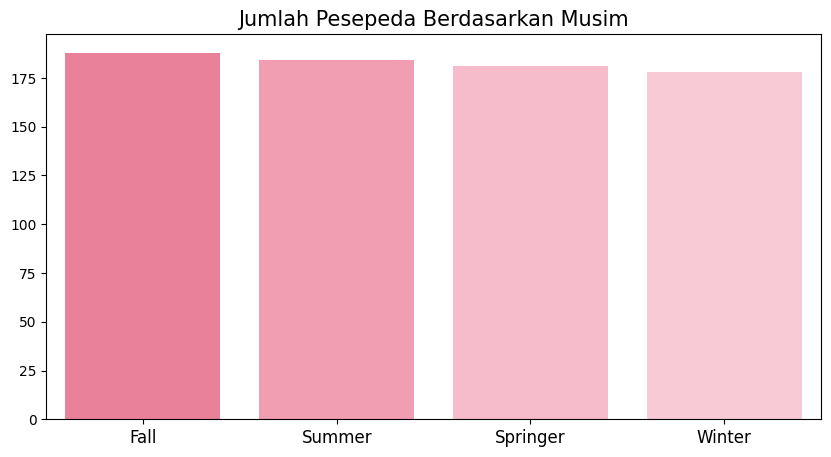

In [49]:
byseason_df = days_df.groupby(by="season").instant.nunique().reset_index()
plt.figure(figsize=(10, 5))
colors = ["#fb6f92", "#ff8fab", "#ffb3c6", "#ffc2d1", "#ffe5ec"]
sns.barplot(
    y="instant",
    x="season",
    data=byseason_df.sort_values(by="instant", ascending=False),
    palette=colors
)

plt.title("Jumlah Pesepeda Berdasarkan Musim", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Pertanyaan 2:

Bagaimana persebaran pengguna sepeda berdasarkan cuaca?

<ipython-input-50-91980504eddc>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-50-91980504eddc>:8: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(


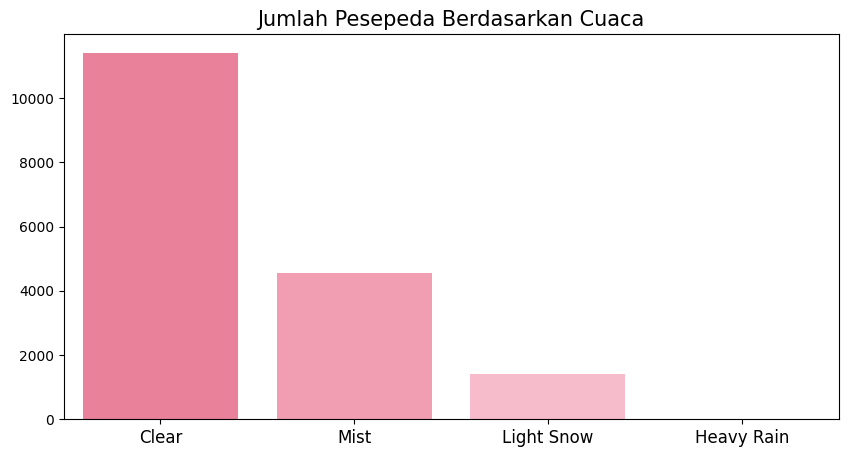

In [50]:
byweather_df = hours_df.groupby(by="weathersit").instant.nunique().reset_index()
byweather_df.rename(columns = {
    "instant" : "biker"
}, inplace = True)
colors = ["#fb6f92", "#ff8fab", "#ffb3c6", "#ffc2d1", "#ffe5ec"]
plt.figure(figsize=(10, 5))

sns.barplot(
    y="biker",
    x="weathersit",
    data=byweather_df.sort_values(by="biker", ascending=False),
    palette=colors
)

plt.title("Jumlah Pesepeda Berdasarkan Cuaca", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()


### Pertanyaan 3:

Kapan waktu paling banyak terdapat pengguna sepeda?






<ipython-input-79-90571a8e90a3>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="hr", y="cnt", data=sum_bike_hours_df.head(5), palette=colors, ax=ax[0])
<ipython-input-79-90571a8e90a3>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="hr", y="cnt", data=sum_bike_hours_df.sort_values(by='cnt', ascending=True).head(5), palette=colors, ax=ax[1])


Text(0.5, 1.0, 'Waktu Yang Paling Sedikit Pengguna')

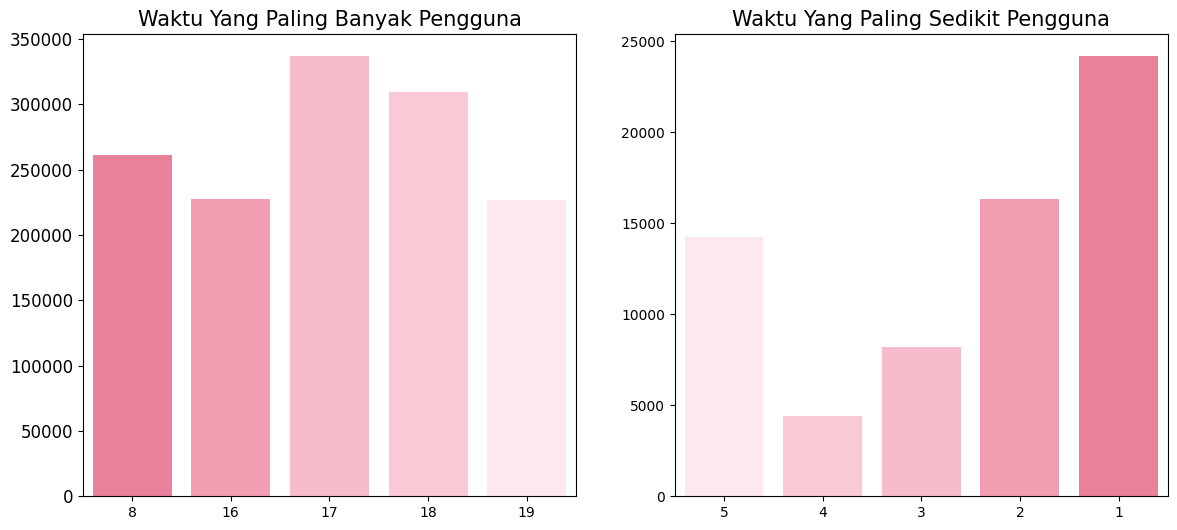

In [79]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
colors = ["#fb6f92", "#ff8fab", "#ffb3c6", "#ffc2d1", "#ffe5ec"]

if isinstance(sum_bike_hours_df, pd.Series):
    sum_bike_hours_df = sum_bike_hours_df.to_frame()

sns.barplot(x="hr", y="cnt", data=sum_bike_hours_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Waktu Yang Paling Banyak Pengguna", loc="center", fontsize=15)
ax[0].tick_params(axis='y', labelsize=12)

sns.barplot(x="hr", y="cnt", data=sum_bike_hours_df.sort_values(by='cnt', ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].set_title("Waktu Yang Paling Sedikit Pengguna", loc="center", fontsize=15)

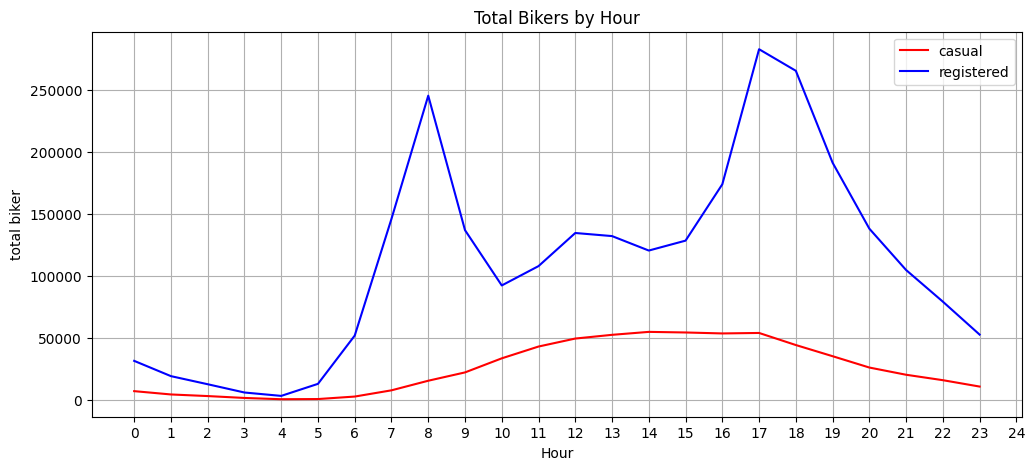

In [80]:
hour_df = hours_df['hr']
total_biker_df = hours_df['cnt']

hourly_totals = hours_df.groupby(by='hr')[['casual', 'registered']].sum()

hour_df = hourly_totals.index

total_casual_df = hourly_totals['casual']
total_registered_df = hourly_totals['registered']

plt.figure(figsize=(12, 5))
plt.plot(hour_df,total_casual_df, label = 'casual', color='red')
plt.plot(hour_df,total_registered_df, label = 'registered', color='blue')
plt.xlabel('Hour')
plt.xticks(range(0,25))
plt.ylabel('total biker')
plt.title('Total Bikers by Hour')
plt.grid(True)
plt.legend()
plt.show()

### Pertanyaan 4:

Berapa perbandingan pengguna yang berlangganan dan tidak berlangganan?


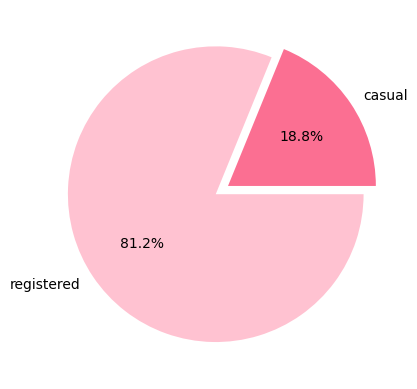

In [82]:
tipe_instant_df = ("casual", "registered")
colors = ('#fb6f92', '#ffc2d1')
explode = (0.1, 0)
fig, ax = plt.subplots()

ax.pie(
    x=total_instant_df,
    labels=tipe_instant_df,
    autopct='%1.1f%%',
    colors=colors,
    explode=explode
)
plt.show()

## Conclusion

- Pesepeda terbanyak terjadi pada musim gugur atau fall season berdasarkan data harian
- berdasarkan data per jam, pesepeda menyukai cuaca cerah
- berdasarkan data per jam, pesepeda terbanyak terjadi pada jam 17.00
- berdasarkan hasil analisis, pengguna sepeda terbanyak adalah registered